In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.linalg import eigh
from sklearn import datasets
%config InlineBackend.figure_format = 'retina'
np.random.seed(21)
import os
from PIL import Image
from tqdm import tqdm
from sklearn.decomposition import PCA

###  Load the data set

And look at some of the images


In [164]:
data_files = list(os.listdir('KDEF_Straight'))
size_im = np.array(Image.open('KDEF_Straight/' + data_files[0])).shape
im_size = size_im[0]//3, size_im[1]//3
X = np.zeros((len(data_files), im_size[0]*im_size[1]))
for i, file in tqdm(enumerate(data_files)):
    im = Image.open('KDEF_Straight/' + file).convert('L')
    im = im.resize((im_size[1], im_size[0]))
    X[i,:] = (np.array(im)/255).flatten()

0it [00:00, ?it/s]

932it [00:09, 96.77it/s] 


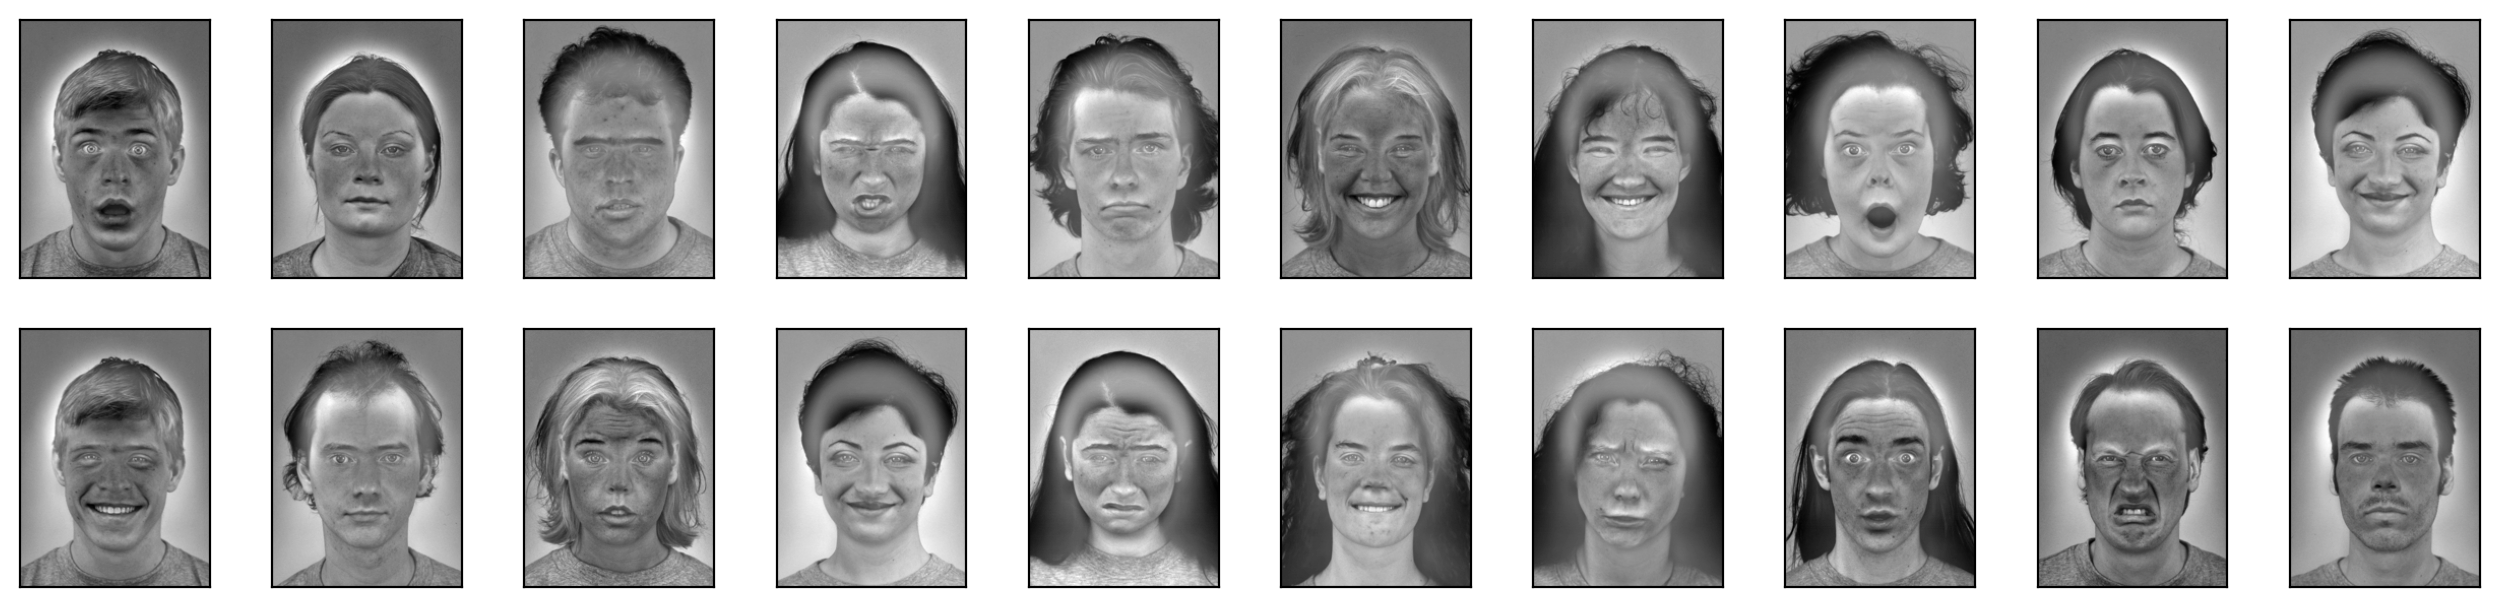

In [174]:
fig = plt.figure(figsize=(16,80))
random_is = np.random.randint(0, X.shape[0], 20)
for j, i in enumerate(random_is):    
    ax = fig.add_subplot(40,10,j+1,xticks = [], yticks = [])
    image_i = X[i,:]
    ax.imshow(image_i.reshape(im_size), cmap=plt.cm.gray)

###  Normalizing the data

Subtract the average image from all the images. Do not standardise (divide by the standard deviation).

Before applying PCA it is custom to normalize the data to avoid that the scales of single features dominate the first principle components.

For face images, normalization is performed by computing the average training image $\widehat{\mathbf{x}}$ and subtracting it from each of the training images, $\mathbf{x}_i - \widehat{\mathbf{x}}$. 


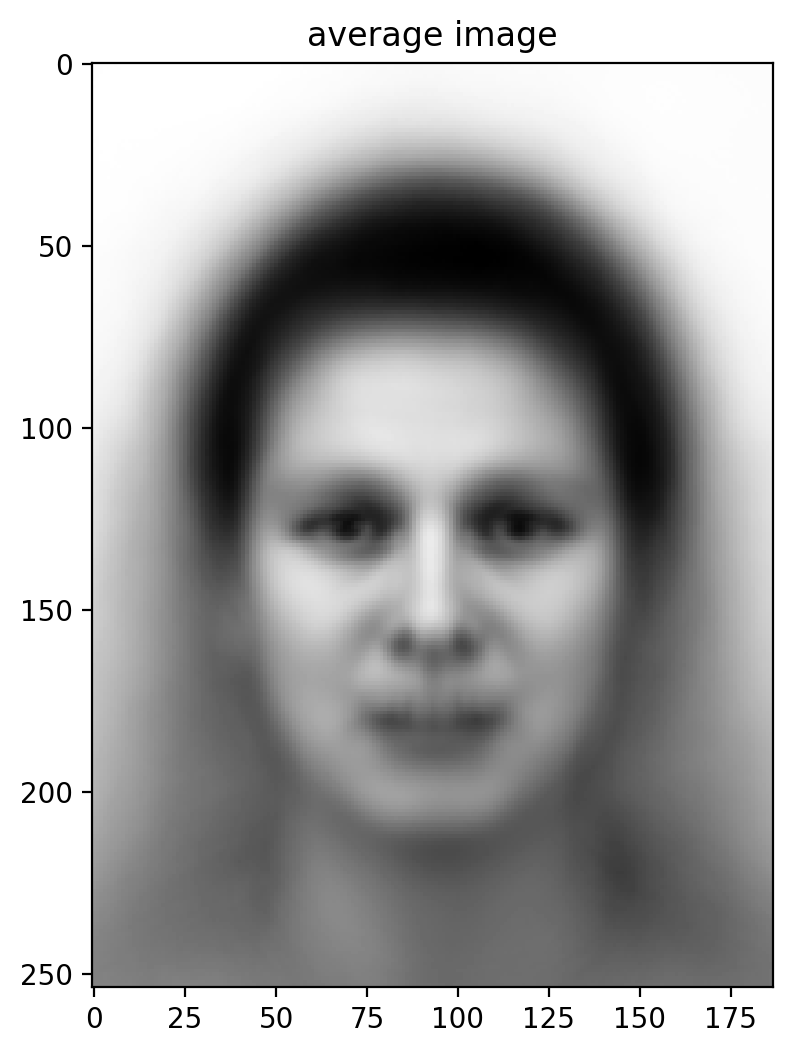

In [166]:
X_mean = np.mean(X,axis=0)
X = X - X_mean

plt.figure(figsize=(20, 6))
plt.imshow(X_mean.reshape(im_size), cmap = plt.cm.gray)
plt.title('average image');

###  Principal component analysis and eigenfaces

Run PCA on the images (with the average image subtracted). The scores (i.e., the representation of the images in PCA space) will be the predictors in the linear encoding model.

In [172]:
#define PCA model to use
pca = PCA(copy=True)

#fit PCA model to data
pca_fit = pca.fit_transform(X.T)
pca_fit.shape

(47498, 932)

## 3
Visually present the first few PCA components as images. Visualise a component by reconstructing the images that has the max/min score for that component. Compare these to the mean image. You can also create synthetic image using scores that lie somewhere between the max/min score. In this way you can visualise the effect that one principal component has on the images. **Show figures of your visualisation. What image features do the PCs represent?**

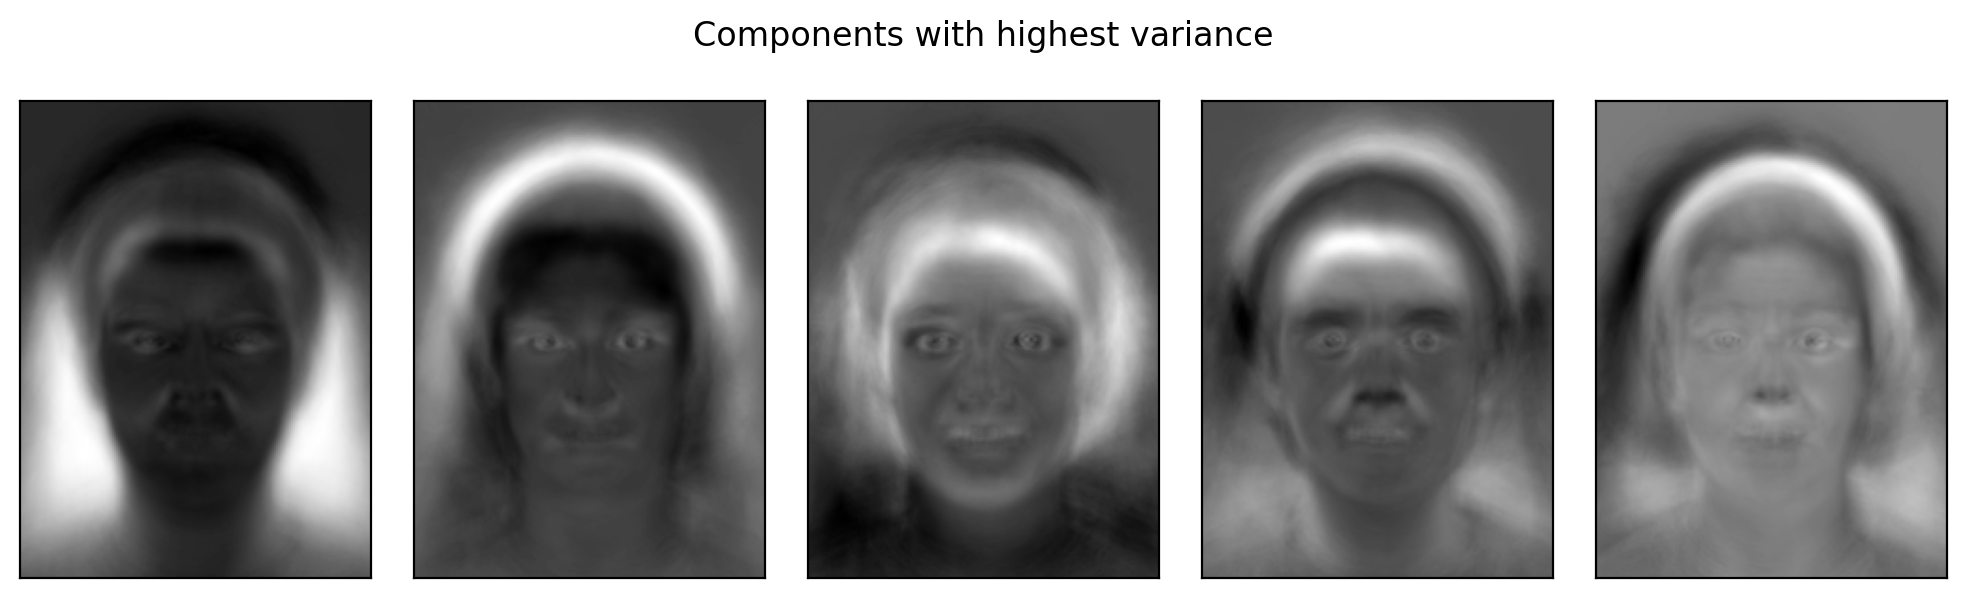

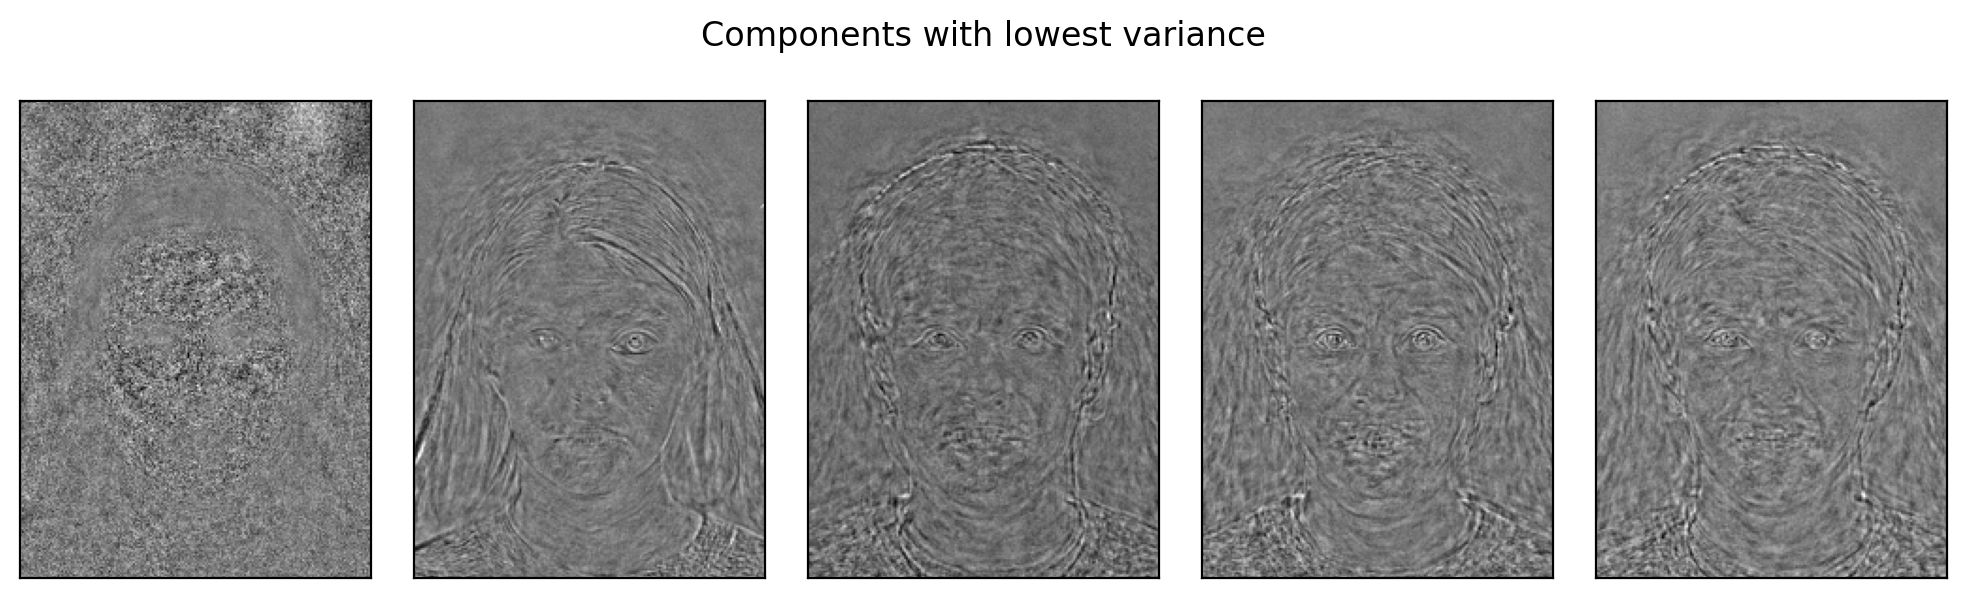

In [173]:
# plot eigenfaces
fig = plt.figure(figsize=(10,3),tight_layout=True)
for i in range(5):    
    ax = fig.add_subplot(1, 5,i+1,xticks = [], yticks = [])  
    im = pca_fit[:,i]
    ax.imshow(im.reshape(im_size),cmap = plt.cm.gray)
fig.suptitle('Components with highest variance');
plt.show();

# plot eigenfaces
fig = plt.figure(figsize=(10,3),tight_layout=True)
for i in range(1,6):
    ax = fig.add_subplot(1, 5,i,xticks = [], yticks = [])  
    im = pca_fit[:,-i]
    ax.imshow(im.reshape(im_size),cmap = plt.cm.gray)
plt.grid()
fig.suptitle('Components with lowest variance');
plt.show();

## 4
Show a bar plot of the variance explained for all the PCs. Use it to select which PCs you want to include in your model. You should reduce the dimensionality significantly. How did you decide?

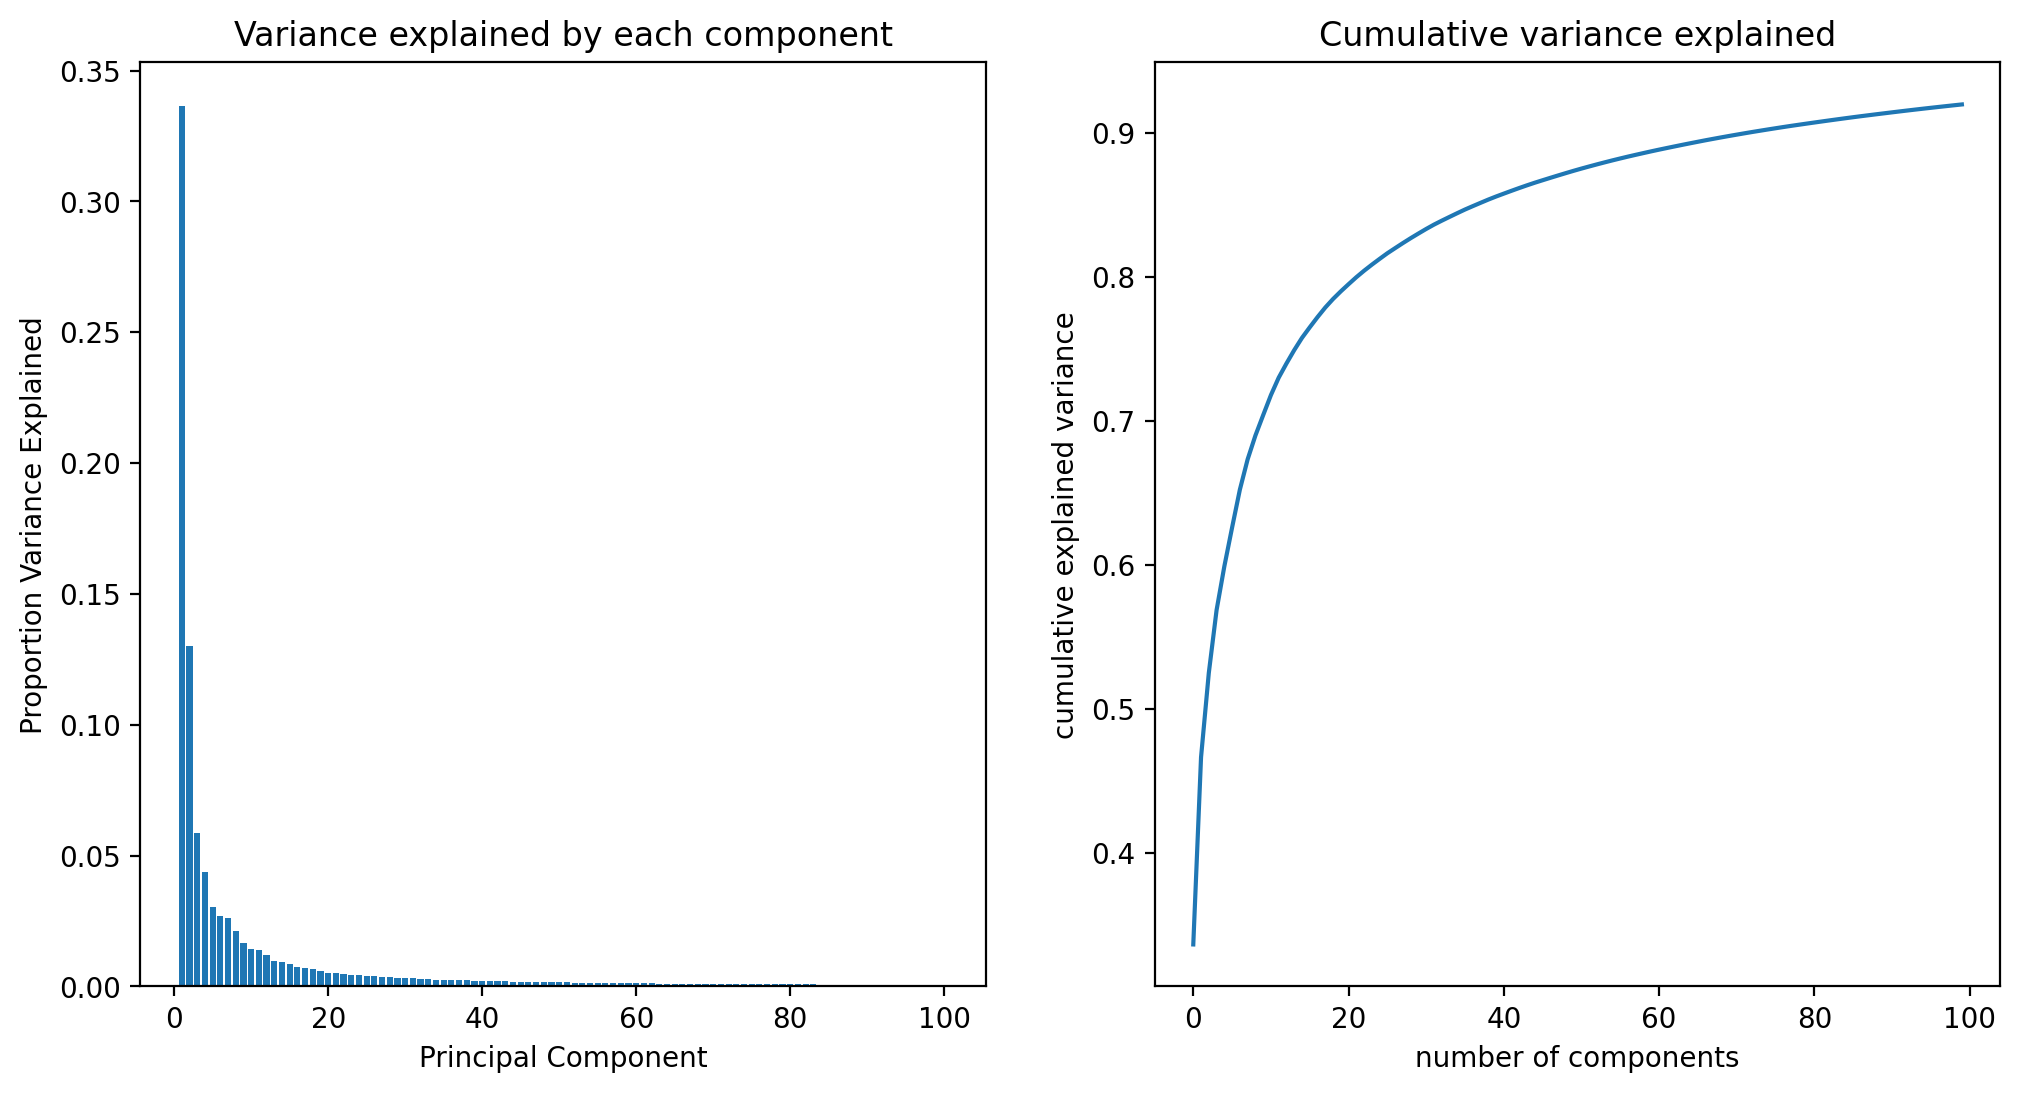

In [105]:
PC_values = np.arange(pca.n_components_) + 1
fig, ax = plt.subplots(1,2, figsize=(12,6))
ax[0].bar(PC_values[:100], pca.explained_variance_ratio_[:100])
ax[0].set_title('Variance explained by each component')
ax[0].set_xlabel('Principal Component')
ax[0].set_ylabel('Proportion Variance Explained')

#plot cummulative variance explained    
summ = pca.explained_variance_ratio_.sum()
cumsum = 0
total_var_explained = np.zeros(100)
for i in range(100):    
    cumsum += pca.explained_variance_ratio_[i]
    total_var_explained[i]=(cumsum/summ)
ax[1].plot(total_var_explained)
ax[1].set_xlabel('number of components')
ax[1].set_ylabel('cumulative explained variance');
ax[1].set_title('Cumulative variance explained');

### Decomposing faces using eigenfaces

We will take a look at eigenfaces constructed using $M$ eigenfaces (principal components).
It is noteworthy that the different faces require a different amount of principal components. Those most similar to the mean image require the lowest amount of principal components.

In [179]:
pca_fit.shape

(47498, 932)

ValueError: shapes (47498,) and (932,932) not aligned: 47498 (dim 0) != 932 (dim 0)

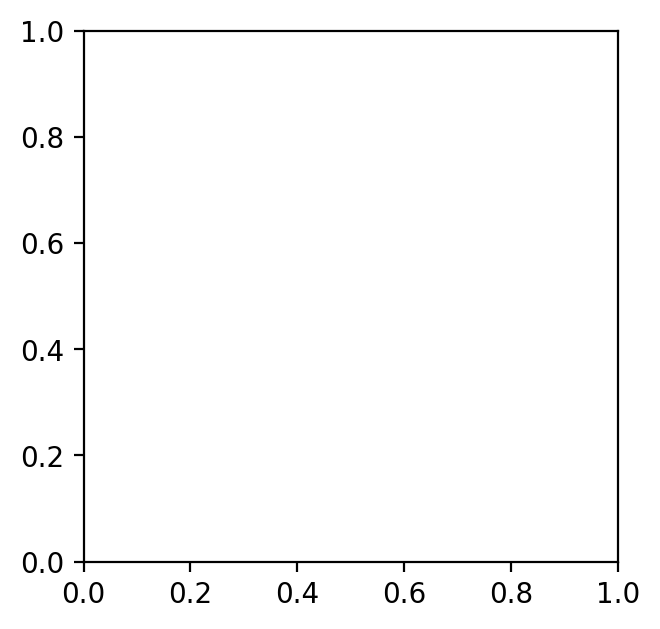

In [185]:
randperm = np.random.permutation(X.shape[0])

plt.figure(figsize=(20, 20))
for i in range(3):
    
    j = randperm[i]
    # show image
    ax = plt.subplot2grid((5, 5), (i, 0))
    
    ax.imshow(pca.inverse_transform(X[j, :]).reshape(im_size),cmap = plt.cm.gray)
    plt.title('Original image')
    
    # show mean value
    ax = plt.subplot2grid((5, 5), (i, 1))
    ax.imshow(X_mean.reshape(im_size),cmap = plt.cm.gray)
    plt.title('Mean image')
        
    for idx_m, m in enumerate([5, 10, 100]):
    
        # z = pca.components_@X[:, j]
        # x_reconstruction = X_mean + pca_fit[idx_m,:m]@pca.components_[:m,idx_m]
        X_projected = pca.inverse_transform(pca_fit)
        x_reconstruction = pca_fit.dot(pca.components_) + pca.mean_
    
        ax = plt.subplot2grid((5, 5), (i, 2 + idx_m))
        ax.imshow(x_reconstruction.reshape(im_size),cmap = plt.cm.gray)
        
        plt.title('Reconstructed using M=%d' % m)
    